In [1]:
!pip install functime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 126.2 MB/s eta 0:00:00
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=234e363df53c5a3684

In [2]:
!pip install pyarrow==11.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 12.0.1
    Uninstalling pyarrow-12.0.1:
      Successfully uninstalled pyarrow-12.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.17.9 requires pyarrow<10.0dev,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.


In [3]:
!pip install flaml

In [4]:
import polars as pl
import pandas as pd

In [5]:
weekly_train_pl = pl.read_parquet("https://github.com/descendant-ai/functime/raw/main/data/m4_1w_train.parquet")
hourly_train_pl = pl.read_parquet('https://github.com/descendant-ai/functime/raw/main/data/m4_1d_train.parquet')

weekly_test_pl = pl.read_parquet("https://github.com/descendant-ai/functime/raw/main/data/m4_1w_test.parquet")
hourly_test_pl = pl.read_parquet('https://github.com/descendant-ai/functime/raw/main/data/m4_1d_test.parquet')

yearly_train_pl = pl.read_parquet('https://github.com/descendant-ai/functime/raw/main/data/m4_1y_train.parquet')
yearly_test_pl = pl.read_parquet('https://github.com/descendant-ai/functime/raw/main/data/m4_1y_test.parquet')

In [6]:
from flaml import tune
from functime.forecasting import auto_lightgbm
from functime.forecasting import lightgbm
import time

In [38]:
tic = time.perf_counter()
time_budget = 60

# Fit model
forecaster = auto_lightgbm(
    freq=None,
    min_lags=4,
    max_lags=52,
    test_size=13,
    time_budget=time_budget,
)
forecaster.fit(y=weekly_train_pl)
toc = time.perf_counter()
# Get best lags and model hyperparameters
best_params = forecaster.best_params

🚀 Evaluating models with n=4 lags:   0%|          | 0/49 [00:00<?, ?it/s]

[flaml.tune.tune: 07-24 15:26:35] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[flaml.tune.tune: 07-24 15:26:39] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:26:51] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:26:58] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.007984315856285453, 'reg_lambda': 0.5298552038879263, 'colsample_bytree': 0.6188135009106049, 'subsample': 0.7730381405116522, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:27:09] {773} INFO - trial 5 config: {'n_estimators': 80, 'num_leaves': 48, 'reg_alpha': 0.001, 'reg_lam

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=5 lags:   2%|▏         | 1/49 [01:32<1:14:20, 92.92s/it]

[flaml.tune.tune: 07-24 15:28:08] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:28:15] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:28:27] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:28:33] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=6 lags:   4%|▍         | 2/49 [02:58<1:09:18, 88.48s/it]

[flaml.tune.tune: 07-24 15:29:33] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:29:38] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:29:51] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:29:59] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=7 lags:   6%|▌         | 3/49 [04:02<59:17, 77.34s/it]  

[flaml.tune.tune: 07-24 15:30:38] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:30:43] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:30:56] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:31:04] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=8 lags:   8%|▊         | 4/49 [05:29<1:00:54, 81.21s/it]

[flaml.tune.tune: 07-24 15:32:05] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:32:13] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:32:27] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:32:35] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=9 lags:  10%|█         | 5/49 [06:29<53:59, 73.62s/it]  

[flaml.tune.tune: 07-24 15:33:05] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:33:13] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:33:27] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:33:34] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=10 lags:  12%|█▏        | 6/49 [07:31<49:54, 69.65s/it]

[flaml.tune.tune: 07-24 15:34:07] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:34:13] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:34:27] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:34:36] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=11 lags:  14%|█▍        | 7/49 [08:33<47:04, 67.26s/it]

[flaml.tune.tune: 07-24 15:35:09] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:35:16] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:35:31] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:35:40] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=12 lags:  16%|█▋        | 8/49 [09:43<46:32, 68.12s/it]

[flaml.tune.tune: 07-24 15:36:19] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:36:28] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:36:46] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:36:55] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=13 lags:  18%|█▊        | 9/49 [10:52<45:33, 68.34s/it]

[flaml.tune.tune: 07-24 15:37:28] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:37:37] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:37:53] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:38:03] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=14 lags:  20%|██        | 10/49 [12:04<45:05, 69.37s/it]

[flaml.tune.tune: 07-24 15:38:40] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:38:47] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:39:06] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:39:14] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=15 lags:  22%|██▏       | 11/49 [13:15<44:18, 69.96s/it]

[flaml.tune.tune: 07-24 15:39:51] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:40:01] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:40:18] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:40:29] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=16 lags:  24%|██▍       | 12/49 [14:31<44:11, 71.66s/it]

[flaml.tune.tune: 07-24 15:41:06] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:41:16] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:41:34] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:41:44] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=17 lags:  27%|██▋       | 13/49 [15:48<43:57, 73.27s/it]

[flaml.tune.tune: 07-24 15:42:23] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:42:34] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:42:55] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:43:06] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=18 lags:  29%|██▊       | 14/49 [16:50<40:51, 70.03s/it]

[flaml.tune.tune: 07-24 15:43:26] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:43:37] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:43:55] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:44:07] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=19 lags:  31%|███       | 15/49 [18:12<41:44, 73.67s/it]

[flaml.tune.tune: 07-24 15:44:48] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:44:59] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:45:18] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:45:30] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=20 lags:  33%|███▎      | 16/49 [19:15<38:41, 70.34s/it]

[flaml.tune.tune: 07-24 15:45:51] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:46:03] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:46:22] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:46:35] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=21 lags:  35%|███▍      | 17/49 [20:20<36:39, 68.73s/it]

[flaml.tune.tune: 07-24 15:46:56] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:47:08] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:47:27] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:47:41] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=22 lags:  37%|███▋      | 18/49 [21:26<35:06, 67.96s/it]

[flaml.tune.tune: 07-24 15:48:02] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:48:15] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:48:37] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:48:51] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=23 lags:  39%|███▉      | 19/49 [22:35<34:02, 68.08s/it]

[flaml.tune.tune: 07-24 15:49:10] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:49:26] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:49:47] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:50:00] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=24 lags:  41%|████      | 20/49 [23:47<33:29, 69.31s/it]

[flaml.tune.tune: 07-24 15:50:22] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:50:35] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:50:56] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:51:12] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=25 lags:  43%|████▎     | 21/49 [24:57<32:26, 69.51s/it]

[flaml.tune.tune: 07-24 15:51:32] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:51:45] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:52:09] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:52:23] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=26 lags:  45%|████▍     | 22/49 [26:07<31:23, 69.78s/it]

[flaml.tune.tune: 07-24 15:52:43] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:52:57] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:53:20] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:53:35] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=27 lags:  47%|████▋     | 23/49 [27:23<31:01, 71.60s/it]

[flaml.tune.tune: 07-24 15:53:59] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:54:12] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:54:35] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:54:50] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=28 lags:  49%|████▉     | 24/49 [28:39<30:23, 72.94s/it]

[flaml.tune.tune: 07-24 15:55:15] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:55:29] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:55:57] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:56:12] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=29 lags:  51%|█████     | 25/49 [30:01<30:16, 75.70s/it]

[flaml.tune.tune: 07-24 15:56:37] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:56:52] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:57:18] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:57:37] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=30 lags:  53%|█████▎    | 26/49 [31:24<29:49, 77.79s/it]

[flaml.tune.tune: 07-24 15:57:59] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:58:16] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:58:43] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:58:59] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=31 lags:  55%|█████▌    | 27/49 [32:49<29:19, 79.96s/it]

[flaml.tune.tune: 07-24 15:59:24] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 15:59:40] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:00:07] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:00:24] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=4, score=386.99] Evaluating models with n=32 lags:  57%|█████▋    | 28/49 [34:13<28:28, 81.36s/it]

[flaml.tune.tune: 07-24 16:00:49] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:01:08] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:01:34] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=33 lags:  59%|█████▉    | 29/49 [35:15<25:09, 75.47s/it]

[flaml.tune.tune: 07-24 16:01:51] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:02:09] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:02:37] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=34 lags:  61%|██████    | 30/49 [36:19<22:48, 72.02s/it]

[flaml.tune.tune: 07-24 16:02:55] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:03:11] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:03:39] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=35 lags:  63%|██████▎   | 31/49 [37:21<20:43, 69.07s/it]

[flaml.tune.tune: 07-24 16:03:57] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:04:14] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:04:42] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=36 lags:  65%|██████▌   | 32/49 [38:25<19:05, 67.38s/it]

[flaml.tune.tune: 07-24 16:05:00] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:05:17] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:05:47] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=37 lags:  67%|██████▋   | 33/49 [39:31<17:50, 66.90s/it]

[flaml.tune.tune: 07-24 16:06:06] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:06:26] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:06:54] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=38 lags:  69%|██████▉   | 34/49 [40:37<16:43, 66.89s/it]

[flaml.tune.tune: 07-24 16:07:13] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:07:33] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:08:03] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=39 lags:  71%|███████▏  | 35/49 [41:50<15:59, 68.52s/it]

[flaml.tune.tune: 07-24 16:08:25] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:08:44] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:09:18] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=40 lags:  73%|███████▎  | 36/49 [43:02<15:06, 69.76s/it]

[flaml.tune.tune: 07-24 16:09:38] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:10:00] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:10:31] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=41 lags:  76%|███████▌  | 37/49 [44:18<14:19, 71.64s/it]

[flaml.tune.tune: 07-24 16:10:54] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:11:16] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:11:48] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=42 lags:  78%|███████▊  | 38/49 [45:35<13:24, 73.09s/it]

[flaml.tune.tune: 07-24 16:12:11] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:12:30] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:13:04] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=43 lags:  80%|███████▉  | 39/49 [46:49<12:12, 73.26s/it]

[flaml.tune.tune: 07-24 16:13:24] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:13:46] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:14:22] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=44 lags:  82%|████████▏ | 40/49 [48:08<11:15, 75.08s/it]

[flaml.tune.tune: 07-24 16:14:44] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:15:06] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:15:37] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=45 lags:  84%|████████▎ | 41/49 [49:26<10:07, 75.91s/it]

[flaml.tune.tune: 07-24 16:16:01] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:16:24] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:16:58] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=46 lags:  86%|████████▌ | 42/49 [50:46<09:00, 77.22s/it]

[flaml.tune.tune: 07-24 16:17:22] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:17:45] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:18:18] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=47 lags:  88%|████████▊ | 43/49 [52:07<07:49, 78.28s/it]

[flaml.tune.tune: 07-24 16:18:42] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:19:05] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:19:40] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=48 lags:  90%|████████▉ | 44/49 [53:31<06:40, 80.04s/it]

[flaml.tune.tune: 07-24 16:20:07] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:20:30] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=49 lags:  92%|█████████▏| 45/49 [54:31<04:56, 74.19s/it]

[flaml.tune.tune: 07-24 16:21:07] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:21:32] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:22:07] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=50 lags:  94%|█████████▍| 46/49 [55:56<03:51, 77.18s/it]

[flaml.tune.tune: 07-24 16:22:31] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:22:56] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=51 lags:  96%|█████████▌| 47/49 [56:59<02:25, 72.90s/it]

[flaml.tune.tune: 07-24 16:23:34] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:23:59] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=52 lags:  98%|█████████▊| 48/49 [57:59<01:09, 69.15s/it]

[flaml.tune.tune: 07-24 16:24:35] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-24 16:24:58] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}


🚀 [Best round: lags=4, score=386.99] Evaluating models with n=53 lags: 100%|██████████| 49/49 [59:03<00:00, 72.31s/it]


In [39]:
print(toc - tic)

3545.6091797509994


In [40]:
# Fit
forecaster = lightgbm(**best_params)
forecaster.fit(y=weekly_train_pl)

# Predict
y_pred = forecaster.predict(fh=13)

In [41]:
y_pred_pd = y_pred.to_pandas()
weekly_test_pd = weekly_test_pl.to_pandas()

In [42]:
y_pred_pd['sort_id'] = y_pred_pd['series'].str[1:].astype(int)
predicted = y_pred_pd.sort_values(['sort_id', 'time'])
predicted = predicted.merge(weekly_test_pd, on=['series', 'time'])
import numpy as np
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (0.0001 + (np.abs(A) + np.abs(F))))
def grouped_smape(df):
    return smape(df['weekly_y'], df['weekly_x'])
from tqdm import tqdm
# import matplotlib.pyplot as plt
test = predicted.groupby('series').apply(grouped_smape)
print(np.mean(test))

11.593495743281084


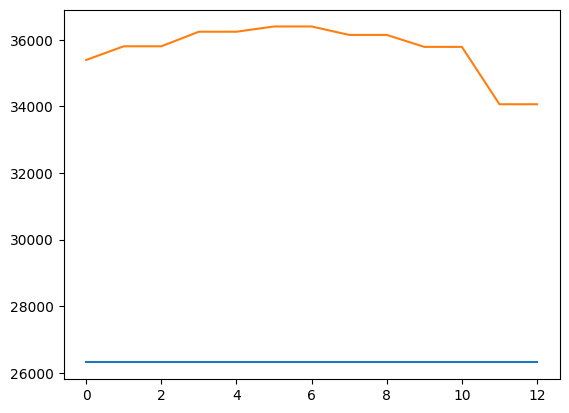

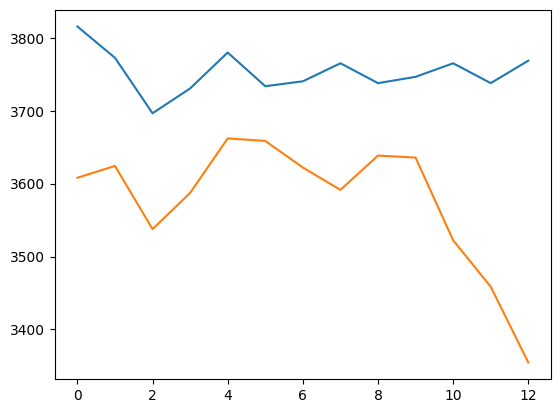

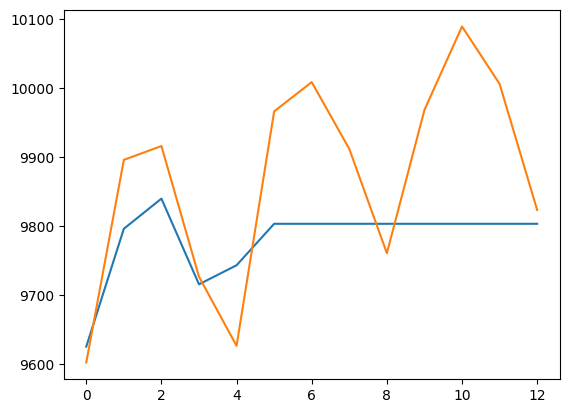

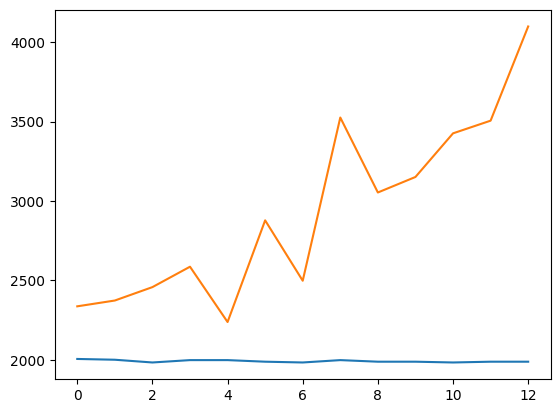

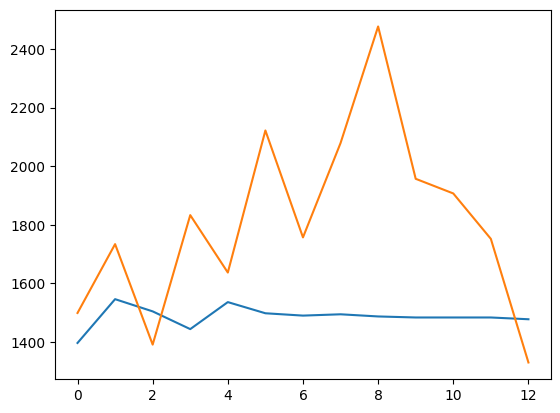

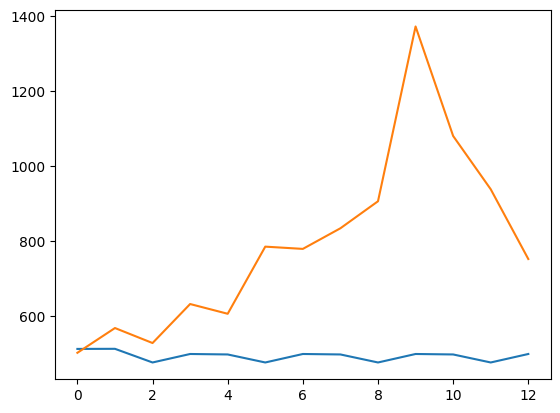

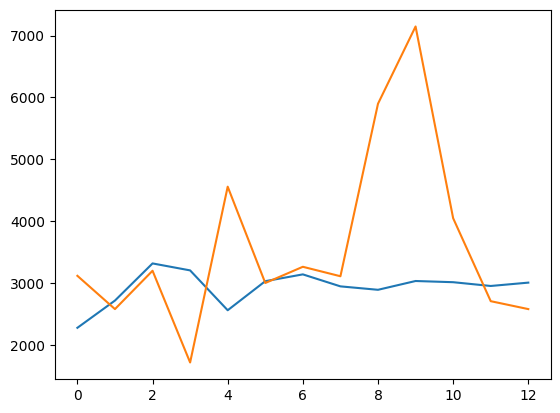

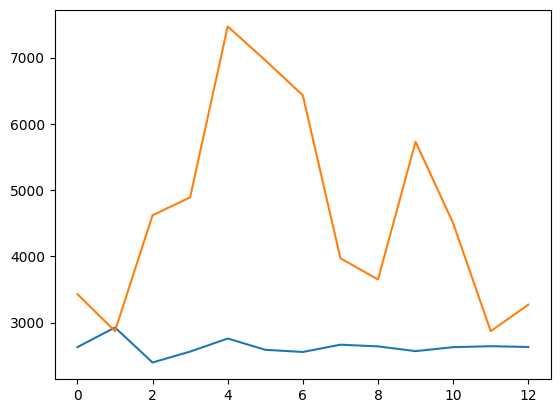

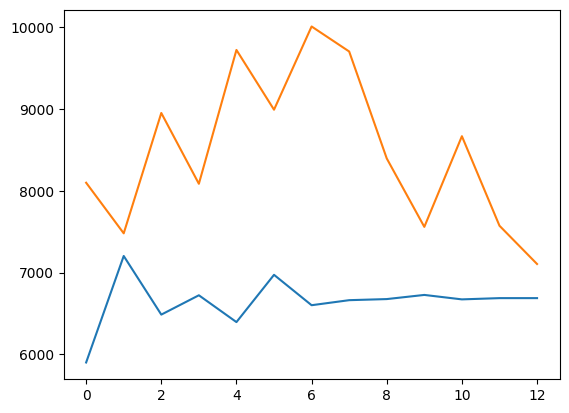

In [44]:
import matplotlib.pyplot as plt
for i in range(1, 10):
  plt.plot(y_pred_pd[y_pred_pd['series'] == f'W{i}']['weekly'].values)
  plt.plot(weekly_test_pd[weekly_test_pd['series'] == f'W{i}']['weekly'].values)
  plt.show()

In [7]:
tic = time.perf_counter()
time_budget = 1000

# Fit model
forecaster = auto_lightgbm(
    freq=None,
    min_lags=1,
    max_lags=5,
    test_size=3,
    time_budget=time_budget,
)
forecaster.fit(y=yearly_train_pl)
toc = time.perf_counter()
# Get best lags and model hyperparameters
best_params = forecaster.best_params

🚀 Evaluating models with n=1 lags:   0%|          | 0/5 [00:00<?, ?it/s]

[flaml.tune.tune: 07-25 13:40:12] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[flaml.tune.tune: 07-25 13:40:24] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 13:40:35] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 13:40:40] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.007984315856285453, 'reg_lambda': 0.5298552038879263, 'colsample_bytree': 0.6188135009106049, 'subsample': 0.7730381405116522, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 13:40:50] {773} INFO - trial 5 config: {'n_estimators': 80, 'num_leaves': 32, 'reg_alpha': 0.0024762437234

🚀 [Best round: lags=1, score=837.26] Evaluating models with n=2 lags:  20%|██        | 1/5 [16:56<1:07:47, 1016.79s/it]

[flaml.tune.tune: 07-25 13:57:09] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 13:57:13] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 13:57:25] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 13:57:30] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=1, score=837.26] Evaluating models with n=3 lags:  40%|████      | 2/5 [33:42<50:31, 1010.35s/it]  

[flaml.tune.tune: 07-25 14:13:54] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:13:59] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:14:10] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:14:17] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=1, score=837.26] Evaluating models with n=4 lags:  60%|██████    | 3/5 [50:44<33:51, 1015.68s/it]

[flaml.tune.tune: 07-25 14:30:56] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:31:02] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:31:14] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:31:19] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=1, score=837.26] Evaluating models with n=5 lags:  80%|████████  | 4/5 [1:07:41<16:56, 1016.12s/it]

[flaml.tune.tune: 07-25 14:47:53] {773} INFO - trial 1 config: {'n_estimators': 40, 'num_leaves': 2, 'reg_alpha': 0.002624570650559949, 'reg_lambda': 0.6080101522778687, 'colsample_bytree': 0.6176855370868456, 'subsample': 0.6211956701608718, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:47:58] {773} INFO - trial 2 config: {'n_estimators': 60, 'num_leaves': 32, 'reg_alpha': 0.0024762437234529607, 'reg_lambda': 0.5368433852579201, 'colsample_bytree': 0.5324468880156994, 'subsample': 0.6717517714184293, 'subsample_freq': 3, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:48:10] {773} INFO - trial 3 config: {'n_estimators': 60, 'num_leaves': 2, 'reg_alpha': 0.0026245706505599498, 'reg_lambda': 0.6080101522778699, 'colsample_bytree': 0.6176855370868455, 'subsample': 0.621195670160872, 'subsample_freq': 4, 'min_child_samples': 10}
[flaml.tune.tune: 07-25 14:48:17] {773} INFO - trial 4 config: {'n_estimators': 60, 'num_leaves': 16, 'reg_alpha': 0.00798431585628

🚀 [Best round: lags=1, score=837.26] Evaluating models with n=6 lags: 100%|██████████| 5/5 [1:24:33<00:00, 1014.72s/it]


In [8]:
print(toc - tic)

5077.70746689


In [9]:
print(best_params)

{'freq': None, 'n_estimators': 100, 'num_leaves': 40, 'reg_alpha': 0.0017364885153587984, 'reg_lambda': 0.006126148628759876, 'colsample_bytree': 0.4602212407402569, 'subsample': 0.5803827524056616, 'subsample_freq': 3, 'min_child_samples': 5, 'max_horizons': None, 'strategy': 'recursive', 'lags': 1}


In [10]:
# Fit
forecaster = lightgbm(**best_params)
forecaster.fit(y=yearly_train_pl)

# Predict
y_pred = forecaster.predict(fh=6)

In [11]:
y_pred_pd = y_pred.to_pandas()
yearly_test_pd = yearly_test_pl.to_pandas()

In [12]:
y_pred_pd['sort_id'] = y_pred_pd['series'].str[1:].astype(int)
predicted = y_pred_pd.sort_values(['sort_id', 'time'])
predicted = predicted.merge(yearly_test_pd, on=['series', 'time'])
import numpy as np
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (0.0001 + (np.abs(A) + np.abs(F))))
def grouped_smape(df):
    return smape(df['yearly_y'], df['yearly_x'])
from tqdm import tqdm
# import matplotlib.pyplot as plt
test = predicted.groupby('series').apply(grouped_smape)
print(np.mean(test))

19.408000134195966


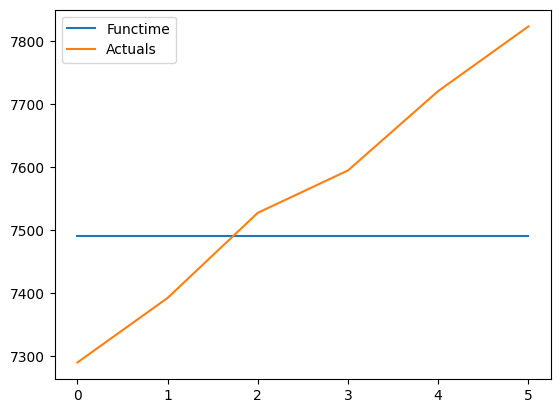

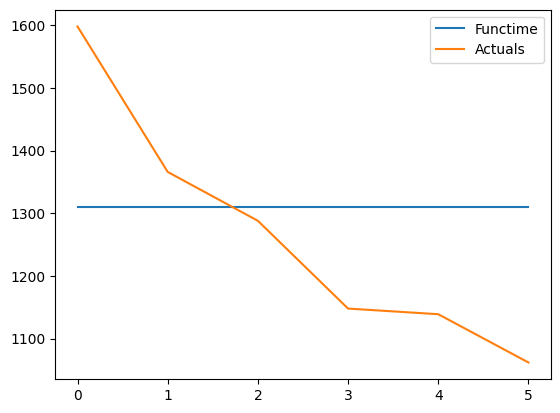

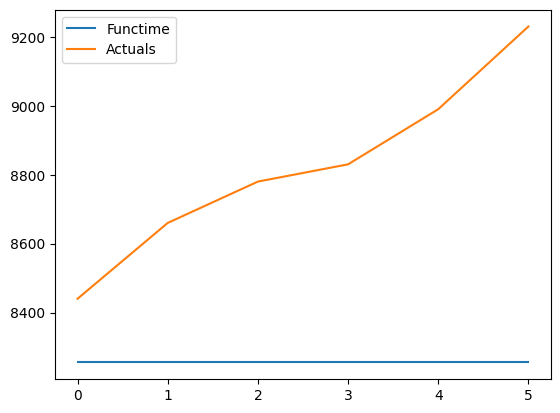

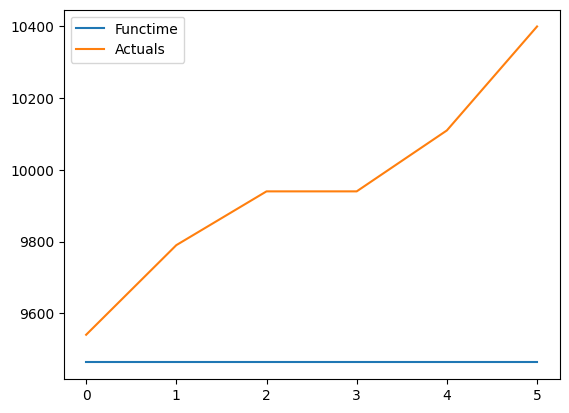

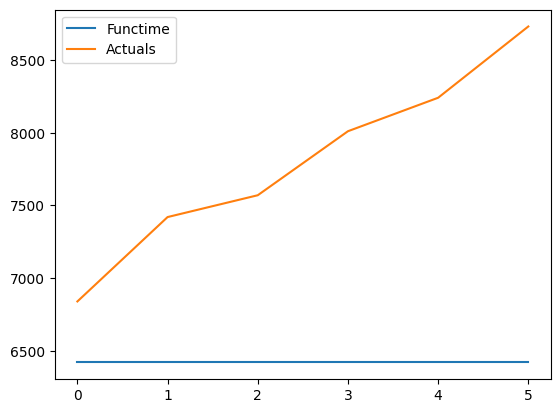

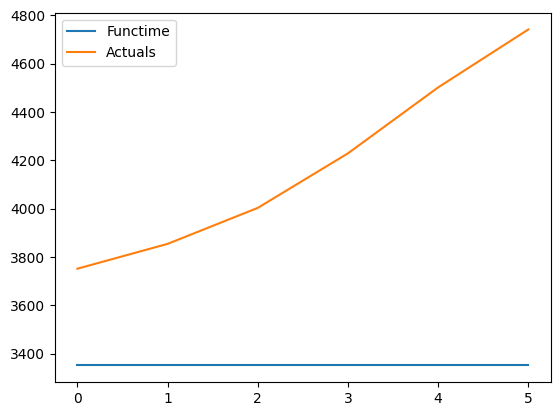

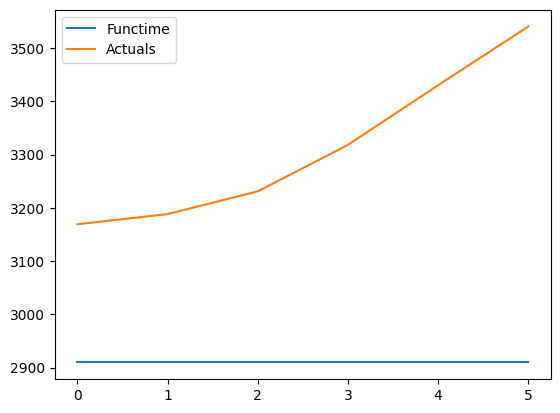

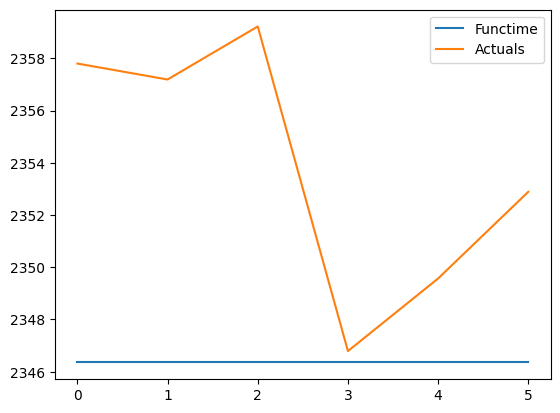

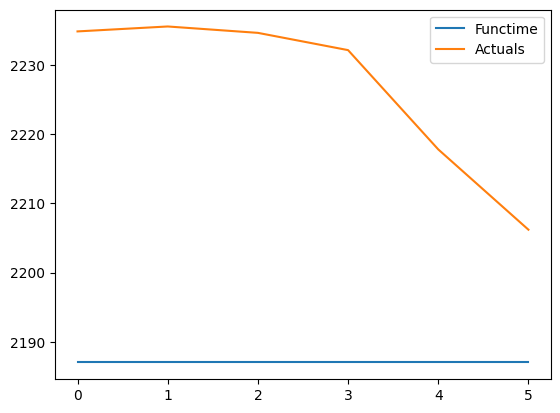

In [13]:
import matplotlib.pyplot as plt
for i in range(1, 10):
  plt.plot(y_pred_pd[y_pred_pd['series'] == f'Y{i}']['yearly'].values, label='Functime')
  plt.plot(yearly_test_pd[yearly_test_pd['series'] == f'Y{i}']['yearly'].values, label='Actuals')
  plt.legend()
  plt.show()